In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import os
os.environ["PYDEVD_DISABLE_FILE_VALIDATION"] = "1"

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rc
# from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.font_manager
import matplotlib.colors as colors


SMALL_SIZE = 12
MEDIUM_SIZE = 17
BIGGER_SIZE = 19

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=12.5)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)


plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'

In [4]:
import specfit as sf
import numpy as np #numerical computations
import pandas as pd #data analysis and manipulation

# Functions

In [5]:
# def my_func(a0,a1,a2,Nu): #up to a3 for curved sources
#     return(a0 + a1*np.log(Nu) + a2*np.log(Nu)**2) #polynomial model expression (removed: + a3*np.log(Nu)**3)

# # If my_func(a0, a1, a2, a3, Nu) is defined with 4 coefficients
# def get_bound(Infer_data, ModelFreq, Max_Freq): # Accepts 3 arguments
#     y = []
    
#     # Define all possible coefficients to extract (a[0] through a[3])
#     max_order = 2 
#     a_keys = [f'a[{i}]' for i in range(max_order + 1)]
    
#     # Determine the number of samples available, limit to 10000 or less
#     # Use a key that we know exists (a[0]) to safely get the length
#     if a_keys[0] not in Infer_data['posterior']:
#         raise ValueError("Posterior data is corrupted: 'a[0]' not found.")
        
#     num_samples = len(Infer_data['posterior'][a_keys[0]][0].values)
    
#     # Use a step to thin the samples (e.g., take every 100th sample)
#     for j in range(0, num_samples, 100): 
        
#         # Initialize coefficients, assuming a max order of 3
#         a0, a1, a2 = 0.0, 0.0, 0.0
        
#         # DYNAMIC EXTRACTION: Only extract coefficients that exist in the idata
#         # If 'a[3]' is missing, a3 remains 0.0, which correctly simplifies the polynomial
#         if 'a[0]' in Infer_data['posterior']: a0 = Infer_data['posterior']['a[0]'][0][j].values
#         if 'a[1]' in Infer_data['posterior']: a1 = Infer_data['posterior']['a[1]'][0][j].values
#         if 'a[2]' in Infer_data['posterior']: a2 = Infer_data['posterior']['a[2]'][0][j].values

#         # Calculate the Flux Density (S) using the coefficients
#         y.append(np.exp(my_func(a0, a1, a2, ModelFreq)))
            
#     y_data = np.array(y)
    
#     # Calculate the 68% confidence interval (16th and 84th percentiles)
#     lower_68 = np.percentile(y_data, 16, axis=0)
#     upper_68 = np.percentile(y_data, 84, axis=0)
    
#     # Calculate the 95% confidence interval (2.5th and 97.5th percentiles)
#     lower_95 = np.percentile(y_data, 2.5, axis=0)
#     upper_95 = np.percentile(y_data, 97.5, axis=0)
    
#     return(lower_68, upper_68, lower_95, upper_95)

In [5]:
def my_func(a0,a1,a2,a3, Nu): #up to a3 for curved sources
    return(a0 + a1*np.log(Nu) + a2*np.log(Nu)**2  + a3*np.log(Nu)**3) #polynomial model expression (removed: + a3*np.log(Nu)**3)

# If my_func(a0, a1, a2, a3, Nu) is defined with 4 coefficients
def get_bound(Infer_data, ModelFreq, Max_Freq): # Accepts 3 arguments
    y = []
    
    # Define all possible coefficients to extract (a[0] through a[3])
    max_order = 3 
    a_keys = [f'a[{i}]' for i in range(max_order + 1)]
    
    # Determine the number of samples available, limit to 10000 or less
    # Use a key that we know exists (a[0]) to safely get the length
    if a_keys[0] not in Infer_data['posterior']:
        raise ValueError("Posterior data is corrupted: 'a[0]' not found.")
        
    num_samples = len(Infer_data['posterior'][a_keys[0]][0].values)
    
    # Use a step to thin the samples (e.g., take every 100th sample)
    for j in range(0, num_samples, 100): 
        
        # Initialize coefficients, assuming a max order of 3
        a0, a1, a2, a3 = 0.0, 0.0, 0.0, 0.0
        
        # DYNAMIC EXTRACTION: Only extract coefficients that exist in the idata
        # If 'a[3]' is missing, a3 remains 0.0, which correctly simplifies the polynomial
        if 'a[0]' in Infer_data['posterior']: a0 = Infer_data['posterior']['a[0]'][0][j].values
        if 'a[1]' in Infer_data['posterior']: a1 = Infer_data['posterior']['a[1]'][0][j].values
        if 'a[2]' in Infer_data['posterior']: a2 = Infer_data['posterior']['a[2]'][0][j].values
        if 'a[3]' in Infer_data['posterior']: a3 = Infer_data['posterior']['a[3]'][0][j].values

        # Calculate the Flux Density (S) using the coefficients
        y.append(np.exp(my_func(a0, a1, a2, a3, ModelFreq))) #removed ,a3
            
    y_data = np.array(y)
    
    # Calculate the 68% confidence interval (16th and 84th percentiles)
    lower_68 = np.percentile(y_data, 16, axis=0)
    upper_68 = np.percentile(y_data, 84, axis=0)
    
    # Calculate the 95% confidence interval (2.5th and 97.5th percentiles)
    lower_95 = np.percentile(y_data, 2.5, axis=0)
    upper_95 = np.percentile(y_data, 97.5, axis=0)
    
    return(lower_68, upper_68, lower_95, upper_95)

In [6]:
import sympy as sp
import pymc as pm
import arviz as az

def posterior_predictive_sampling(idata, model, num_pp_samples):

    with model:
        pm.sample_posterior_predictive(idata, extend_inferencedata=True)

    # reduced_samples = az.extract(idata.posterior, num_samples=num_pp_samples)
    # post = reduced_samples.posterior
    post = az.extract(idata.posterior, num_samples=num_pp_samples)
    var_names = list(post.data_vars)

    ret = {}
    for v in var_names:
        ret[v] = post[v]

    return ret
    
    # az.plot_ppc(idata, num_pp_samples=100)

In [7]:
def gaussian(x, mean, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * sigma**2))


# Data Preparation

In [8]:
pwd!

'/home/elizabeth/Desktop/Thesis/SED_2025'

In [9]:
directory = '/home/elizabeth/Desktop/Thesis/SED_2025/Specfit_Figures'

In [10]:
parent_dir = '/home/elizabeth/Desktop/Thesis/SED_2025/'

In [11]:
FIG_PATH = os.path.join(parent_dir, directory)  

In [13]:
# os.mkdir(FIG_PATH )  

In [12]:
Data_To_plot = pd.read_excel('Merged.xlsx')

In [13]:
src_name = Data_To_plot['SRC_NAME']
src_name

0     J0010-4153
1     J0022+0014
2     J0025-2602
3     J0059+0006
4     J0137+3309
5     J0203-4349
6     J0210-5101
7     J0240-2309
8     J0252-7104
9     J0303-6211
10    J0318+1628
11    J0323+0534
12    J0405-1308
13    J0409-1757
14    J0420-6223
15    J0423-0120
16    J0431+2037
17    J0440-4333
18    J0447-2203
19    J0453-2807
20    J0521+1638
21    J0538-4405
22    J0609-1542
23    J0616-3456
24    J0632+1022
25    J0730-1141
26    J0735-1735
27    J0828-3731
28    J0854+2006
29    J0906-6829
30    J1008+0730
31    J1051-2023
32    J1058+0133
Name: SRC_NAME, dtype: object

In [14]:
peak_nu_sources = Data_To_plot.filter(items=[0,1,7,9,10,16,26,27], axis=0)

In [15]:
# inverted_sources =  Data_To_plot.filter(items=[6,15,21,22,32], axis=0)
inverted_sources =  Data_To_plot.filter(items=[15,22], axis=0)

In [16]:
linear_sources =  Data_To_plot.filter(items=[2,3,4,5,8,11,12,13,14,17,18,19,
                                             20,23,24,25,28,29,30,31], axis=0)

In [17]:
len(peak_nu_sources)

8

In [18]:
len(inverted_sources)

2

In [19]:
len(linear_sources)

20

In [20]:
def get_data_to_use(Data_To_plot, source_name):
    
    df_temp = Data_To_plot[Data_To_plot['SRC_NAME']== source_name ]

    freq = np.array(
        [
            df_temp.nuMHZ0.values[0],
            df_temp.nuMHZ1.values[0],
            df_temp.nuMHZ2.values[0],
            df_temp.nuMHZ3.values[0],
            df_temp.nuMHZ4.values[0],
            df_temp.nuMHZ5.values[0],
            df_temp.nuMHZ6.values[0],
            df_temp.nuMHZ7.values[0],
            df_temp.nuMHZ8.values[0], 
            df_temp.nuMHZ9.values[0]            
        ]
                   )
    flux = np.array(
        [
            df_temp.SmJy0.values[0],
            df_temp.SmJy1.values[0],
            df_temp.SmJy2.values[0],
            df_temp.SmJy3.values[0],
            df_temp.SmJy4.values[0],
            df_temp.SmJy5.values[0],
            df_temp.SmJy6.values[0],
            df_temp.SmJy7.values[0],
            df_temp.SmJy8.values[0],
            df_temp.SmJy9.values[0]

           ]
    )

    eflux = np.array(
        [
            df_temp.emJy0.values[0],
            df_temp.emJy1.values[0],
            df_temp.emJy2.values[0],
            df_temp.emJy3.values[0],
            df_temp.emJy4.values[0],
            df_temp.emJy5.values[0],
            df_temp.emJy6.values[0],
            df_temp.emJy7.values[0],
            df_temp.emJy8.values[0], 
            df_temp.emJy9.values[0]

           ]
    )

    data_to_plot = pd.DataFrame(data= [freq, flux, eflux]).T

    data_to_plot.columns = ['nuMHZ','SmJy','emJy']

    data_to_plot= data_to_plot.dropna().sort_values(by='nuMHZ')

    # print(data_to_plot)
    
    return(data_to_plot)

# Peak Sources 

Initial Maximum occurs at 577.02702703 MHz
Mu max: 6.610000133514404
Mu max log: 1.8885836740624455


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1], a[2]]


Sampling 4 chains for 9_000 tune and 10_000 draw iterations (36_000 + 40_000 draws total) took 255 seconds.


Inference done
Variables: ['a[0]', 'a[1]', 'a[2]']
Means: [ 1.82272325  0.06991368 -0.48916591]
SDev: [0.05295575 0.13726175 0.07572928]
Covariance Matrix:
[[ 0.0029,-0.0067, 0.0033],
 [-0.0067, 0.019 ,-0.0103],
 [ 0.0033,-0.0103, 0.0057]]
Correlation Matrix:
[[ 1.    ,-0.903 , 0.8171],
 [-0.903 , 1.    ,-0.9842],
 [ 0.8171,-0.9842, 1.    ]]


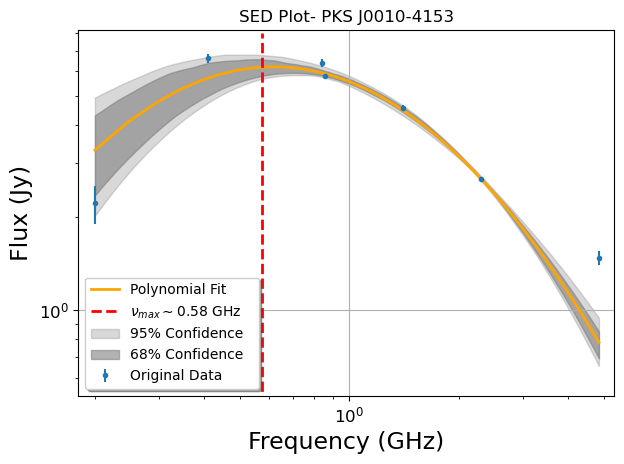

Initial Maximum occurs at 809.75975976 MHz
Mu max: 3.209
Mu max log: 1.1659593621277198


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1], a[2]]


Sampling 4 chains for 9_000 tune and 10_000 draw iterations (36_000 + 40_000 draws total) took 115 seconds.


Inference done
Variables: ['a[0]', 'a[1]', 'a[2]']
Means: [ 1.17568267 -0.04256581 -0.25966126]
SDev: [0.0101467  0.01389604 0.01348276]
Covariance Matrix:
[[ 1.0113e-04, 2.5542e-05,-8.1960e-05],
 [ 2.5542e-05, 1.9704e-04,-1.6661e-04],
 [-8.1960e-05,-1.6661e-04, 1.8433e-04]]
Correlation Matrix:
[[ 1.    , 0.1809,-0.6003],
 [ 0.1809, 1.    ,-0.8742],
 [-0.6003,-0.8742, 1.    ]]


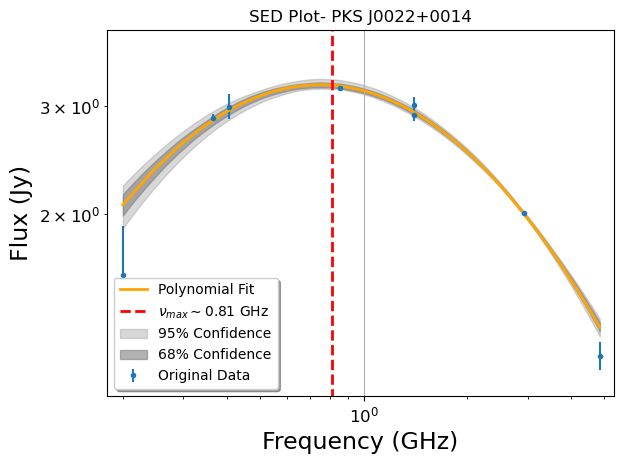

Initial Maximum occurs at 1480.0300300299998 MHz
Mu max: 6.2564
Mu max log: 1.8336049398179495


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1], a[2]]


Sampling 4 chains for 9_000 tune and 10_000 draw iterations (36_000 + 40_000 draws total) took 49 seconds.


Inference done
Variables: ['a[0]', 'a[1]', 'a[2]']
Means: [ 1.80890953  0.01705025 -0.3573256 ]
SDev: [0.01136948 0.0119797  0.01432802]
Covariance Matrix:
[[ 1.3227e-04,-1.2135e-05,-1.1152e-04],
 [-1.2135e-05, 1.4535e-04, 6.1567e-05],
 [-1.1152e-04, 6.1567e-05, 2.0734e-04]]
Correlation Matrix:
[[ 1.    ,-0.0875,-0.6734],
 [-0.0875, 1.    , 0.3547],
 [-0.6734, 0.3547, 1.    ]]


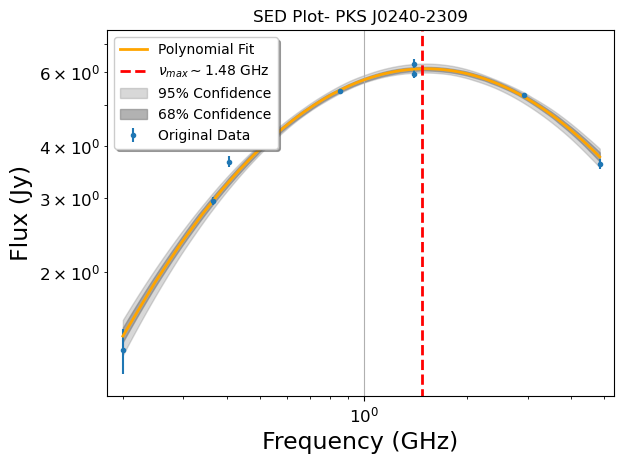

Initial Maximum occurs at 1838.43843844 MHz
Mu max: 3.194
Mu max log: 1.1612740497928207


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1], a[2]]


Sampling 4 chains for 9_000 tune and 10_000 draw iterations (36_000 + 40_000 draws total) took 72 seconds.


Inference done
Variables: ['a[0]', 'a[1]', 'a[2]']
Means: [ 1.04758311 -0.0139755  -0.41292012]
SDev: [0.02043369 0.02210271 0.05861203]
Covariance Matrix:
[[ 0.0004,-0.0003,-0.0011],
 [-0.0003, 0.0005, 0.0011],
 [-0.0011, 0.0011, 0.0035]]
Correlation Matrix:
[[ 1.    ,-0.7282,-0.9304],
 [-0.7282, 1.    , 0.8375],
 [-0.9304, 0.8375, 1.    ]]


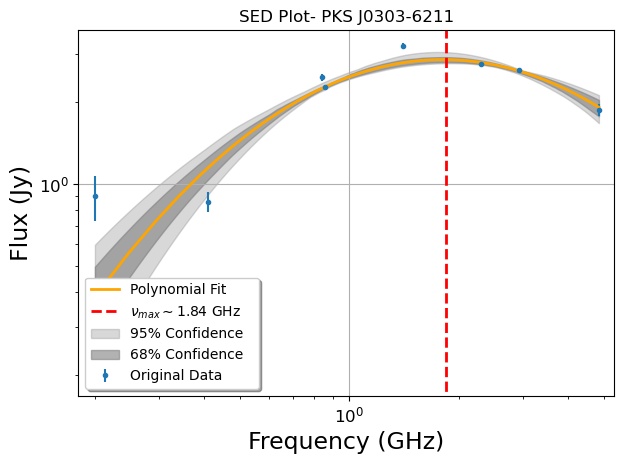

Initial Maximum occurs at 833.03303303 MHz
Mu max: 8.426
Mu max log: 2.131322163556825


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1], a[2]]


Sampling 4 chains for 9_000 tune and 10_000 draw iterations (36_000 + 40_000 draws total) took 88 seconds.


Inference done
Variables: ['a[0]', 'a[1]', 'a[2]']
Means: [ 2.13909631 -0.0685072  -0.24233793]
SDev: [0.01216263 0.01211174 0.01431101]
Covariance Matrix:
[[ 1.5707e-04, 4.5723e-05,-1.3912e-04],
 [ 4.5723e-05, 1.4775e-04,-1.3978e-04],
 [-1.3912e-04,-1.3978e-04, 2.1292e-04]]
Correlation Matrix:
[[ 1.    , 0.3001,-0.7607],
 [ 0.3001, 1.    ,-0.7881],
 [-0.7607,-0.7881, 1.    ]]


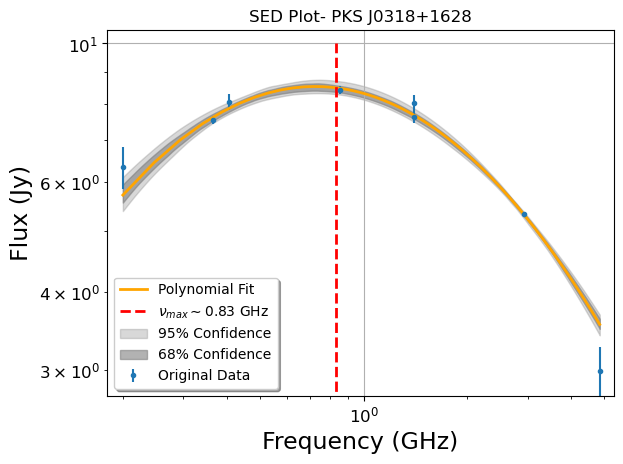

Initial Maximum occurs at 1838.43843844 MHz
Mu max: 3.7555
Mu max log: 1.3232214321439295


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1], a[2]]


Sampling 4 chains for 9_000 tune and 10_000 draw iterations (36_000 + 40_000 draws total) took 63 seconds.


Inference done
Variables: ['a[0]', 'a[1]', 'a[2]']
Means: [ 1.31454865  0.0024478  -0.14022718]
SDev: [0.0082429  0.01247538 0.01270254]
Covariance Matrix:
[[ 7.1070e-05,-9.7139e-05,-1.0087e-04],
 [-9.7139e-05, 1.6108e-04, 1.4737e-04],
 [-1.0087e-04, 1.4737e-04, 1.6988e-04]]
Correlation Matrix:
[[ 1.    ,-0.9079,-0.918 ],
 [-0.9079, 1.    , 0.8909],
 [-0.918 , 0.8909, 1.    ]]


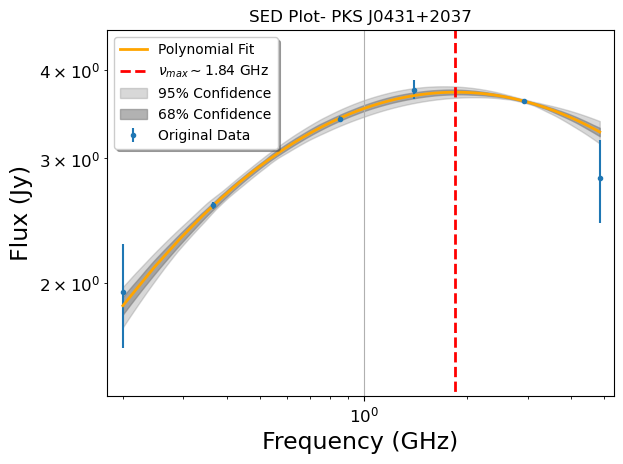

Initial Maximum occurs at 200.0 MHz
Mu max: 5.168970108000001
Mu max log: 1.642673463260443


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1], a[2]]


Sampling 4 chains for 9_000 tune and 10_000 draw iterations (36_000 + 40_000 draws total) took 375 seconds.


Inference done
Variables: ['a[0]', 'a[1]', 'a[2]']
Means: [ 1.2117691  -0.76237932  0.28648458]
SDev: [0.11395755 0.12198328 0.03038842]
Covariance Matrix:
[[ 0.0106,-0.0112, 0.0027],
 [-0.0112, 0.0122,-0.003 ],
 [ 0.0027,-0.003 , 0.0008]]
Correlation Matrix:
[[ 1.    ,-0.9876, 0.9472],
 [-0.9876, 1.    ,-0.9835],
 [ 0.9472,-0.9835, 1.    ]]


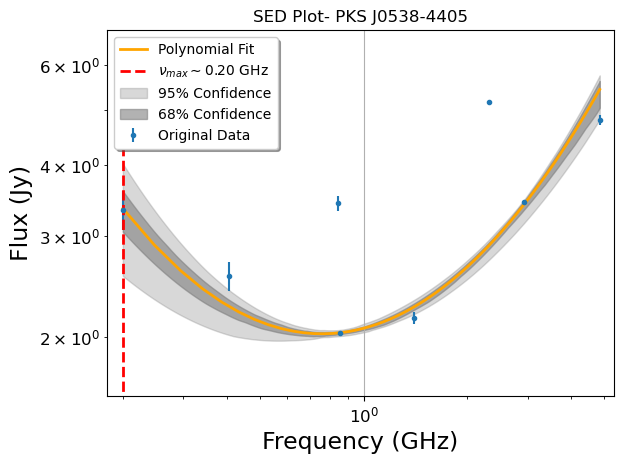

Initial Maximum occurs at 1119.2342342299999 MHz
Mu max: 2.9748
Mu max log: 1.0901768098470082


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1], a[2]]


Sampling 4 chains for 9_000 tune and 10_000 draw iterations (36_000 + 40_000 draws total) took 91 seconds.


Inference done
Variables: ['a[0]', 'a[1]', 'a[2]']
Means: [ 1.05297032  0.06461053 -0.29137411]
SDev: [0.00898132 0.01781556 0.02605255]
Covariance Matrix:
[[ 9.4106e-05, 1.1654e-04,-2.2011e-04],
 [ 1.1654e-04, 3.4307e-04,-4.6995e-04],
 [-2.2011e-04,-4.6995e-04, 7.3740e-04]]
Correlation Matrix:
[[ 1.    , 0.6486,-0.8356],
 [ 0.6486, 1.    ,-0.9343],
 [-0.8356,-0.9343, 1.    ]]


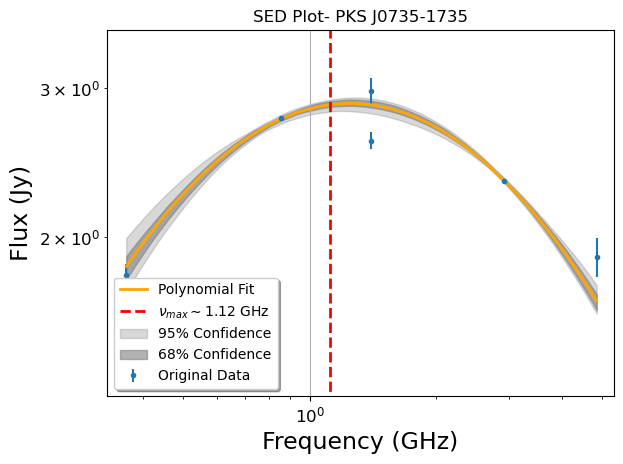

Initial Maximum occurs at 2187.3333333299997 MHz
Mu max: 2.5765000000000002
Mu max log: 0.946431888786142


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1], a[2]]


Sampling 4 chains for 9_000 tune and 10_000 draw iterations (36_000 + 40_000 draws total) took 119 seconds.


Inference done
Variables: ['a[0]', 'a[1]', 'a[2]']
Means: [ 0.84940856  0.09653172 -0.34514769]
SDev: [0.01316265 0.03081922 0.0475212 ]
Covariance Matrix:
[[ 0.0002,-0.0004,-0.0007],
 [-0.0004, 0.001 , 0.0016],
 [-0.0007, 0.0016, 0.0025]]
Correlation Matrix:
[[ 1.    ,-0.9587,-0.9774],
 [-0.9587, 1.    , 0.9877],
 [-0.9774, 0.9877, 1.    ]]


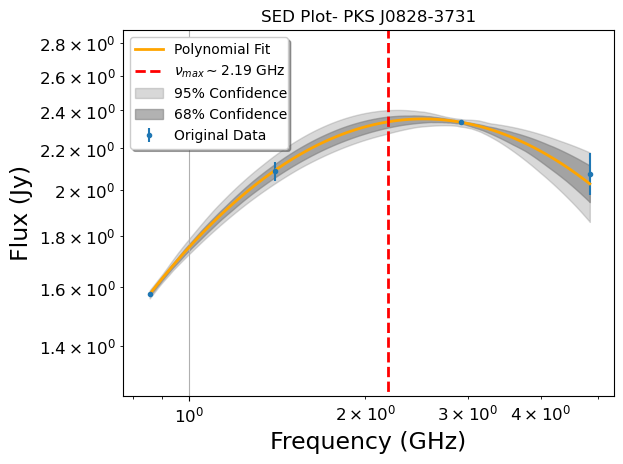

In [30]:
issue_with = [] #empty list to store 'bad sources'

for i in peak_nu_sources.index:


    try:

        src_name = Data_To_plot['SRC_NAME'][i]

        #datatoplot = get_data_to_use(Data_To_plot, src_name)

        datatoplot = get_data_to_use(peak_nu_sources, src_name)


        # Define a function that we will fit to the data. The function
        # takes an array of values, x, at which to calculate its values,
        # and parameters, m (the slope), yinter (the y intercept), that we wish to fit.
        #source_name = src_to_extract

        nu = datatoplot['nuMHZ']*1e6 # to Hertz
        mu = datatoplot['SmJy']*1e-3# to Jy
        sigmaS = datatoplot['emJy']*1e-3 # to Jy
        #nu0=1.0e9

        lognu = np.log(nu)
        logS = np.log(mu)

        # Doing a fitting to find the maximum
        #perform a polynomial fit to the source of interests' data(s,nu log-log plot). 
        #(p) contains the coefficients of the fitted polynomial, and cov is the covariance matrix.
        p, cov = np.polyfit(lognu, 
                            logS, 
                            3, #3
                            w=1/sigmaS, 
                            cov=True)


        freq = np.linspace(np.min(nu), np.max(nu), 1000)
        #freq = nu

        iMax_freq = np.round(freq[np.exp(np.polyval(p,np.log(freq))).argmax()], 2) 
        #evaluate value of fitted polynomial at x-freq on the log scale, covert back .exp and find the maximum.
        #iMax_freq = 1.0e9


        print(f'Initial Maximum occurs at {iMax_freq*1e-6} MHz')

        # Calculating the inference
        #calls a function from specfit to perform Bayesian inference on the data. 

        names, stats, a_cov, a_corr, idata, imodel = sf.data_inference('PKS '+src_name,
                                                                   freq=nu,
                                                                   mu=mu,
                                                                   sigma=sigmaS,
                                                                   order=3,
                                                                   nu0=iMax_freq
                                                                    #nu0=1.0e9
                                                                  )
        print('Inference done')


        a = stats[0] # Means #Extract the mean values (coefficients) from the inference results.
#         a0 = a[0]    #extract the three coefficients from the means
#         a1 = a[1]
#         a2 = a[2]
#         a3 = a[3]

         #1. Call get_bound function with the model frequency array and calculate confidence levels
        model_freq = freq/iMax_freq
        lower_68, upper_68, lower_95, upper_95 = get_bound(idata, model_freq, iMax_freq)
        
        
        # ------------------- PLOTTING CODE BLOCK -------------------
        
        #2. Create the figure and plot data
        
        fig, ax = sf.dataplot(plt, src_name, freq=nu, mu=mu, sigma=sigmaS)
        nu = np.linspace(freq[0], freq[-1], 100)


        #3. Calculate and plot the polynomial fit line (Plotted on top)
        S = sf.flux(nu, a, nu0=iMax_freq)
        ax.plot(nu * 1e-9, S, label="Polynomial Fit", color='orange', linewidth=2)

        ax.vlines(iMax_freq*1e-9, 
               np.floor(ax.get_ylim()[0]),
               np.ceil(ax.get_ylim()[1]), 
               linestyles= 'dashed', color='red',
               lw=2,
               label = r'$\nu_{max}\sim$'+f'{iMax_freq*1e-9:.2f} GHz'
              )
        
        #4. Plot the 95% confidence interval (Wider, Lighter Shading)
        # Use nu_model for the X-axis (must be length 100)
        ax.fill_between((model_freq*iMax_freq) * 1e-9, 
                       lower_95, 
                       upper_95, 
                       color='grey', 
                       alpha=0.3, 
                       label='95% Confidence') 

        #5. Plot the 68% confidence interval (Narrower, Darker Shading)
        ax.fill_between((model_freq*iMax_freq) * 1e-9, 
                       lower_68, 
                       upper_68, 
                       color='grey', 
                       alpha=0.6, 
                       label='68% Confidence')



        #6. Set axis scales and limits (Ensures visible plot)
        ax.set_xscale('log')
        ax.set_yscale('log')
        
        #7. Set limits based on the data range and the 95% bounds
        ax.set_xlim(nu.min() * 1e-9 * 0.9, nu.max() * 1e-9 * 1.1)
        ax.set_ylim(lower_95.min() * 0.8, upper_95.max() * 1.2)

        #8. Define custom legend variables
        x0, y0, width, height = 0, 0, 0.35, 1
   

        ax.legend(loc='best',
           fontsize='small',
           bbox_to_anchor=(x0, y0, width, height),
           ncol=1, 
           mode="expand", 
           fancybox=True, 
           shadow=True, 

          )
        plt.title(f'SED Plot- PKS {src_name}')
        plt.tight_layout()
        
        
        #9. Save the figure using the defined FIG_PATH (FIX: Saving)
        filename = f'{src_name}_specfit_model_spectrum.png'
        full_path = os.path.join(FIG_PATH, filename)

        plt.savefig(full_path, bbox_inches="tight") 
        

        #10. Print statistics
        print(f"Variables: {names}")
        print(f"Means: {stats[0]}")
        print(f"SDev: {stats[1]}")
        print(f"Covariance Matrix:\n{np.array2string(a_cov, separator=',', precision=4)}")
        print(f"Correlation Matrix:\n{np.array2string(a_corr, separator=',', precision=4)}")

        plt.show()

    except Exception as e:
                issue_with.append(src_name)
                # Leave this print statement in until the code works!
                print(f"ERROR for source {src_name}: {e}") 
#     break


# Upturn Sources

In [21]:
inverted_sources

,Unnamed: 0,SRC_NAME,nuMHZ0,SmJy0,emJy0,SRC_NAME1,nuMHZ1,SmJy1,emJy1,SRC_NAME2,...,SmJy7,emJy7,SRC_NAME8,nuMHZ8,SmJy8,emJy8,SRC_NAME9,nuMHZ9,SmJy9,emJy9
15,J0423-0120,J0423-0120,408,1620.000005,100.000001,J0423-0120,1400,2725.8,81.800003,J0423-0120,...,1281.000018,55.000000,J0423-0120,200,1199.917,169.644,J0423-0120,2307,NaN,NaN
22,J0609-1542,J0609-1542,408,2809.999943,360.000014,J0609-1542,1400,2742.4,82.300003,J0609-1542,...,2680.000067,68.000004,J0609-1542,200,2088.547,284.700,J0609-1542,2307,3073.940039,15.12


Initial Minimum occurs at 642.19219219 MHz
Mu max: 4.357
Mu max log: 1.471783747135305


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1], a[2]]


Sampling 4 chains for 9_000 tune and 10_000 draw iterations (36_000 + 40_000 draws total) took 314 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Inference done
Variables: ['a[0]', 'a[1]', 'a[2]']
Means: [0.03444915 0.00629089 0.43352867]
SDev: [0.02847655 0.10370764 0.05794943]
Covariance Matrix:
[[ 0.0008,-0.0027, 0.0009],
 [-0.0027, 0.0112,-0.0044],
 [ 0.0009,-0.0044, 0.0037]]
Correlation Matrix:
[[ 1.    ,-0.9155, 0.5256],
 [-0.9155, 1.    ,-0.6823],
 [ 0.5256,-0.6823, 1.    ]]


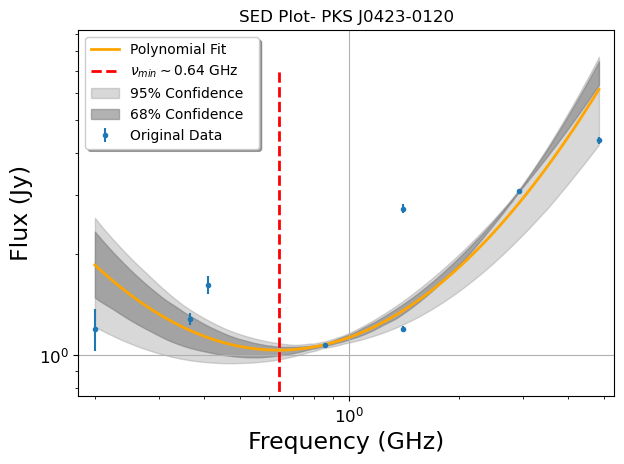

Initial Minimum occurs at 712.0120120099999 MHz
Mu max: 4.1617
Mu max log: 1.4259236446430839


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1], a[2]]


Sampling 4 chains for 9_000 tune and 10_000 draw iterations (36_000 + 40_000 draws total) took 206 seconds.


Inference done
Variables: ['a[0]', 'a[1]', 'a[2]']
Means: [ 0.60883286 -0.20574831  0.55275174]
SDev: [0.00919537 0.02798202 0.01989638]
Covariance Matrix:
[[ 8.9300e-05,-8.4762e-05, 1.1172e-05],
 [-8.4762e-05, 7.1389e-04,-4.8882e-04],
 [ 1.1172e-05,-4.8882e-04, 3.7504e-04]]
Correlation Matrix:
[[ 1.    ,-0.3357, 0.061 ],
 [-0.3357, 1.    ,-0.9447],
 [ 0.061 ,-0.9447, 1.    ]]


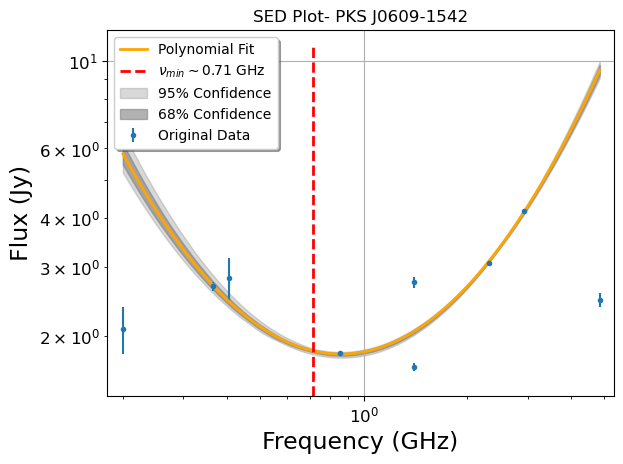

In [26]:
issue_with_2 = [] #empty list to store 'bad sources'

for i in inverted_sources.index:

    try:

        src_name = Data_To_plot['SRC_NAME'][i]

        #datatoplot = get_data_to_use(Data_To_plot, src_name)

        datatoplot = get_data_to_use(inverted_sources, src_name)


        # Define a function that we will fit to the data. The function
        # takes an array of values, x, at which to calculate its values,
        # and parameters, m (the slope), yinter (the y intercept), that we wish to fit.
        #source_name = src_to_extract

        nu = datatoplot['nuMHZ']*1e6 # to Hertz
        mu = datatoplot['SmJy']*1e-3# to Jy
        sigmaS = datatoplot['emJy']*1e-3 # to Jy
        #nu0=1.0e9

        lognu = np.log(nu)
        logS = np.log(mu)

        # Doing a fitting to find the maximum
        #perform a polynomial fit to the source of interests' data(s,nu log-log plot). 
        #(p) contains the coefficients of the fitted polynomial, and cov is the covariance matrix.
        p, cov = np.polyfit(lognu, 
                            logS, 
                            3, #3
                            w=1/sigmaS, 
                            cov=True)


        freq = np.linspace(np.min(nu), np.max(nu), 1000)
        #freq = nu

        iMin_freq = np.round(freq[np.exp(np.polyval(p,np.log(freq))).argmin()], 2) 



        #iMax_freq = np.round(freq[np.exp(np.polyval(p,np.log(freq))).argmax()], 2) 
        #evaluate value of fitted polynomial at x-freq on the log scale, covert back .exp and find the maximum.
        #iMax_freq = 1.0e9


        print(f'Initial Minimum occurs at {iMin_freq*1e-6} MHz')

        # Calculating the inference
        #calls a function from specfit to perform Bayesian inference on the data. 

        names, stats, a_cov, a_corr, idata, imodel = sf.data_inference('PKS '+src_name,
                                                                   freq=nu,
                                                                   mu=mu,
                                                                   sigma=sigmaS,
                                                                   order=3,#curve model
                                                                   nu0=iMin_freq
                                                                    #nu0=1.0e9
                                                                  )
        print('Inference done')


        a = stats[0] # Means #Extract the mean values (coefficients) from the inference results.
        # a0 = a[0]    #extract the three coefficients from the means
        # a1 = a[1]
        # a2 = a[2]
        # #a3 = a[3]

        a = stats[0] # Means

        #1. Call get_bound function with the model frequency array and calculate confidence levels
        model_freq = freq/iMin_freq
        lower_68, upper_68, lower_95, upper_95 = get_bound(idata, model_freq, iMin_freq)
        
        
        # ------------------- PLOTTING CODE BLOCK -------------------
        
        #2. Create the figure and plot data
        
        fig, ax = sf.dataplot(plt, src_name, freq=nu, mu=mu, sigma=sigmaS)
        nu = np.linspace(freq[0], freq[-1], 1000)


        #3. Calculate and plot the polynomial fit line (Plotted on top)
        S = sf.flux(nu, a, nu0=iMin_freq)
        ax.plot(nu * 1e-9, S, label="Polynomial Fit", color='orange', linewidth=2)

        ax.vlines(iMin_freq*1e-9, 
               np.floor(ax.get_ylim()[0]),
               np.ceil(ax.get_ylim()[1]), 
               linestyles= 'dashed', color='red',
               lw=2,
               label = r'$\nu_{min}\sim$'+f'{iMin_freq*1e-9:.2f} GHz'
              )
        
        #4. Plot the 95% confidence interval (Wider, Lighter Shading)
        # Use nu_model for the X-axis (must be length 100)
        ax.fill_between((model_freq*iMin_freq) * 1e-9, 
                       lower_95, 
                       upper_95, 
                       color='grey', 
                       alpha=0.3, 
                       label='95% Confidence') 

        #5. Plot the 68% confidence interval (Narrower, Darker Shading)
        ax.fill_between((model_freq*iMin_freq) * 1e-9, 
                       lower_68, 
                       upper_68, 
                       color='grey', 
                       alpha=0.6, 
                       label='68% Confidence')



         #6. Set axis scales and limits (Ensures visible plot)
        ax.set_xscale('log')
        ax.set_yscale('log')
        
        #7. Set limits based on the data range and the 95% bounds
        ax.set_xlim(nu.min() * 1e-9 * 0.9, nu.max() * 1e-9 * 1.1)
        ax.set_ylim(lower_95.min() * 0.8, upper_95.max() * 1.2)

        #8. Define custom legend variables
        x0, y0, width, height = 0, 0, 0.35, 1
   

        ax.legend(loc='best',
           fontsize='small',
           bbox_to_anchor=(x0, y0, width, height),
           ncol=1, 
           mode="expand", 
           fancybox=True, 
           shadow=True, 

          )
        plt.title(f'SED Plot- PKS {src_name}')
        plt.tight_layout()
        
        
#         #9. Save the figure using the defined FIG_PATH (FIX: Saving)
#         filename = f'{src_name}_specfit_model_spectrum.png'
#         full_path = os.path.join(FIG_PATH, filename)

#         plt.savefig(full_path, bbox_inches="tight") 
        

        #10. Print statistics
        print(f"Variables: {names}")
        print(f"Means: {stats[0]}")
        print(f"SDev: {stats[1]}")
        print(f"Covariance Matrix:\n{np.array2string(a_cov, separator=',', precision=4)}")
        print(f"Correlation Matrix:\n{np.array2string(a_corr, separator=',', precision=4)}")

        plt.show()

    except Exception as e:
                issue_with_2.append(src_name)
                # Leave this print statement in until the code works!
                print(f"ERROR for source {src_name}: {e}") 
#     break





# Linear Sources

Mu max: 17.75
Mu max log: 2.8763855159214247


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1]]


Sampling 4 chains for 6_000 tune and 10_000 draw iterations (24_000 + 40_000 draws total) took 85 seconds.


Inference done
Variables: ['a[0]', 'a[1]']
Means: [ 3.20994107 -0.55652202]
SDev: [0.02224456 0.01063505]
Covariance Matrix:
[[ 0.0005,-0.0002],
 [-0.0002, 0.0001]]
Correlation Matrix:
[[ 1.    ,-0.9544],
 [-0.9544, 1.    ]]


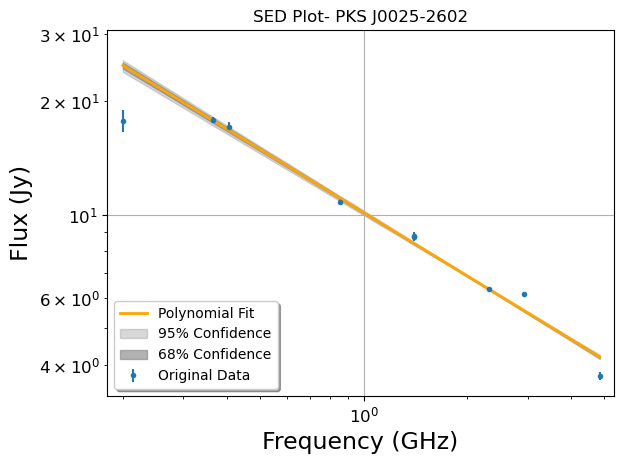

Mu max: 4.525632
Mu max log: 1.5097572359074387


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1]]


Sampling 4 chains for 6_000 tune and 10_000 draw iterations (24_000 + 40_000 draws total) took 54 seconds.


Inference done
Variables: ['a[0]', 'a[1]']
Means: [ 1.6838169  -0.42766748]
SDev: [0.02402291 0.01099698]
Covariance Matrix:
[[ 0.0006,-0.0002],
 [-0.0002, 0.0001]]
Correlation Matrix:
[[ 1.    ,-0.9431],
 [-0.9431, 1.    ]]


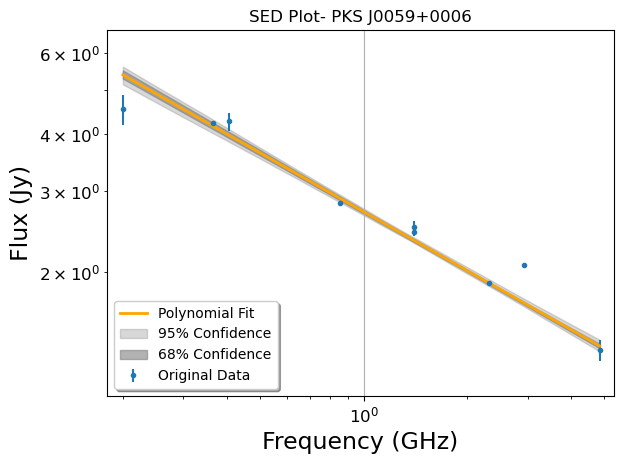

Mu max: 21.497
Mu max log: 3.067913390513999


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1]]


Sampling 4 chains for 6_000 tune and 10_000 draw iterations (24_000 + 40_000 draws total) took 48 seconds.


Inference done
Variables: ['a[0]', 'a[1]']
Means: [ 3.07650175 -0.61329746]
SDev: [0.02073745 0.02204506]
Covariance Matrix:
[[ 0.0004,-0.0004],
 [-0.0004, 0.0005]]
Correlation Matrix:
[[ 1.    ,-0.8788],
 [-0.8788, 1.    ]]


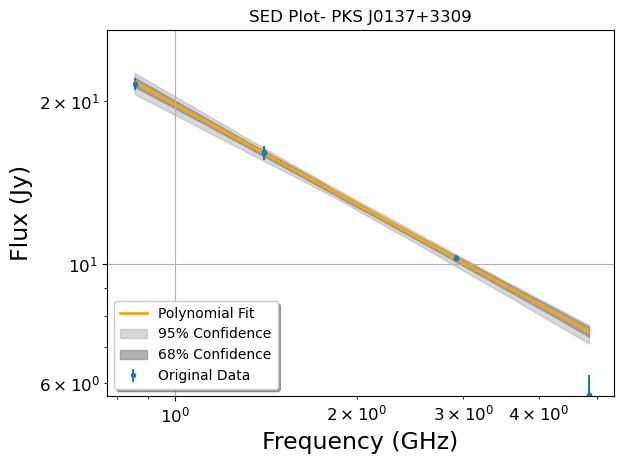

Mu max: 7.724056
Mu max log: 2.0443396146694526


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1]]


Sampling 4 chains for 6_000 tune and 10_000 draw iterations (24_000 + 40_000 draws total) took 58 seconds.


Inference done
Variables: ['a[0]', 'a[1]']
Means: [ 2.11176113 -0.57578593]
SDev: [0.05049925 0.03180808]
Covariance Matrix:
[[ 0.0031,-0.002 ],
 [-0.002 , 0.0013]]
Correlation Matrix:
[[ 1.    ,-0.9766],
 [-0.9766, 1.    ]]


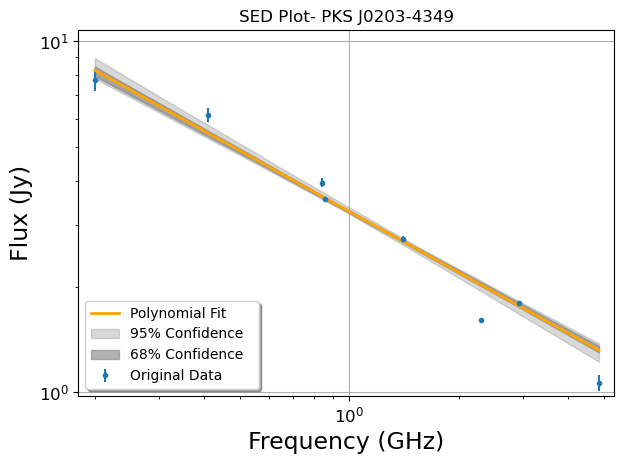

Mu max: 15.424467000000002
Mu max log: 2.7359550148994627


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1]]


Sampling 4 chains for 6_000 tune and 10_000 draw iterations (24_000 + 40_000 draws total) took 83 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Inference done
Variables: ['a[0]', 'a[1]']
Means: [ 3.17374815 -0.74944792]
SDev: [0.06351698 0.04550106]
Covariance Matrix:
[[ 0.0007,-0.0003],
 [-0.0003, 0.0001]]
Correlation Matrix:
[[ 1.    ,-0.9856],
 [-0.9856, 1.    ]]


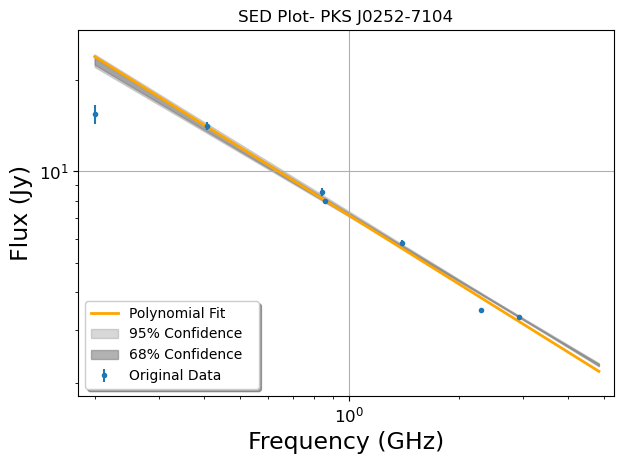

Mu max: 7.940000057000001
Mu max log: 2.071913282437886


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1]]


Sampling 4 chains for 6_000 tune and 10_000 draw iterations (24_000 + 40_000 draws total) took 157 seconds.


Inference done
Variables: ['a[0]', 'a[1]']
Means: [ 2.36551808 -0.6951815 ]
SDev: [0.06229173 0.02345041]
Covariance Matrix:
[[ 0.004 ,-0.0015],
 [-0.0015, 0.0006]]
Correlation Matrix:
[[ 1.    ,-0.9987],
 [-0.9987, 1.    ]]


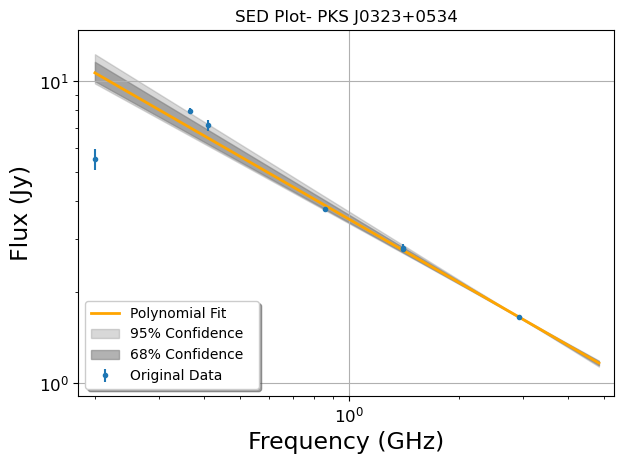

Mu max: 8.00877
Mu max log: 2.0805371912365884


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1]]


Sampling 4 chains for 6_000 tune and 10_000 draw iterations (24_000 + 40_000 draws total) took 135 seconds.


Inference done
Variables: ['a[0]', 'a[1]']
Means: [ 2.05448277 -0.32919666]
SDev: [0.06930962 0.02841618]
Covariance Matrix:
[[ 0.0048,-0.002 ],
 [-0.002 , 0.0008]]
Correlation Matrix:
[[ 1.    ,-0.9962],
 [-0.9962, 1.    ]]


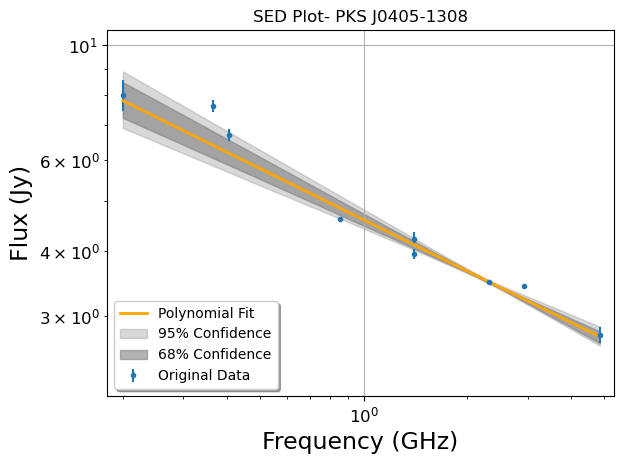

Mu max: 6.276398
Mu max log: 1.83679624904872


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1]]


Sampling 4 chains for 6_000 tune and 10_000 draw iterations (24_000 + 40_000 draws total) took 109 seconds.


Inference done
Variables: ['a[0]', 'a[1]']
Means: [ 1.96610154 -0.59812173]
SDev: [0.04548138 0.0170243 ]
Covariance Matrix:
[[ 0.0016,-0.0006],
 [-0.0006, 0.0002]]
Correlation Matrix:
[[ 1.    ,-0.9989],
 [-0.9989, 1.    ]]


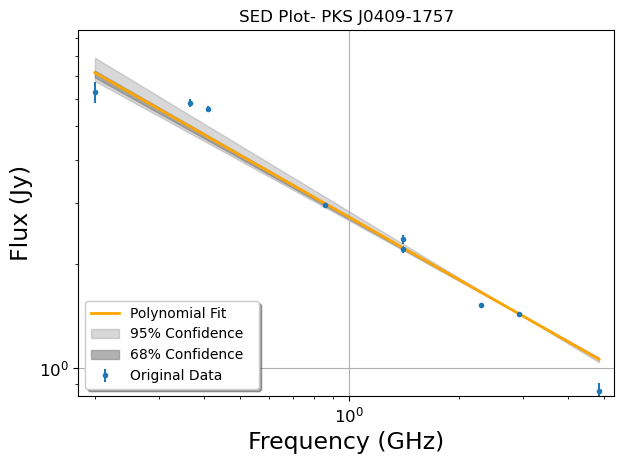

Mu max: 15.356703
Mu max log: 2.7315520562417532


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1]]


Sampling 4 chains for 6_000 tune and 10_000 draw iterations (24_000 + 40_000 draws total) took 1018 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Inference done
Variables: ['a[0]', 'a[1]']
Means: [ 2.73898736 -0.78870422]
SDev: [0.07649048 0.03816746]
Covariance Matrix:
[[ 0.0011,-0.0005],
 [-0.0005, 0.0003]]
Correlation Matrix:
[[ 1.    ,-0.9558],
 [-0.9558, 1.    ]]


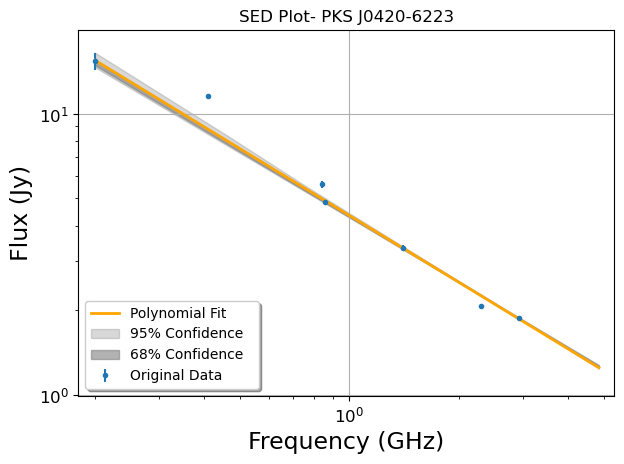

Mu max: 8.119999885559082
Mu max log: 2.0943301400798773


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1]]


Sampling 4 chains for 6_000 tune and 10_000 draw iterations (24_000 + 40_000 draws total) took 77 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Inference done
Variables: ['a[0]', 'a[1]']
Means: [ 1.93268226 -0.28598683]
SDev: [0.10479904 0.07307122]
Covariance Matrix:
[[ 0.0093,-0.0065],
 [-0.0065, 0.0045]]
Correlation Matrix:
[[ 1.    ,-0.9934],
 [-0.9934, 1.    ]]


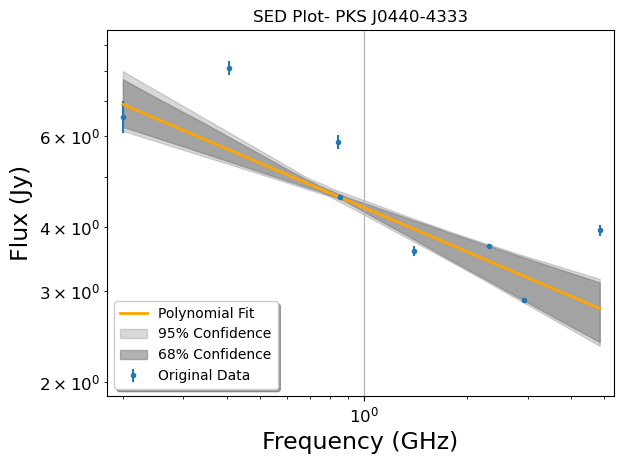

Mu max: 5.112999916
Mu max log: 1.6317862996691508


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1]]


Sampling 4 chains for 6_000 tune and 10_000 draw iterations (24_000 + 40_000 draws total) took 62 seconds.


Inference done
Variables: ['a[0]', 'a[1]']
Means: [ 2.05759143 -0.71101828]
SDev: [0.02829365 0.02571049]
Covariance Matrix:
[[ 0.0008,-0.0007],
 [-0.0007, 0.0007]]
Correlation Matrix:
[[ 1.    ,-0.9373],
 [-0.9373, 1.    ]]


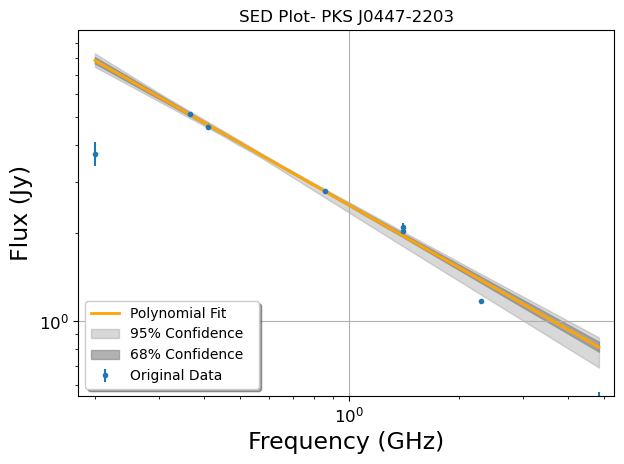

Mu max: 2.5413
Mu max log: 0.9326757611234779


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1]]


Sampling 4 chains for 6_000 tune and 10_000 draw iterations (24_000 + 40_000 draws total) took 68 seconds.


Inference done
Variables: ['a[0]', 'a[1]']
Means: [0.77042884 0.00387801]
SDev: [0.04423062 0.02343016]
Covariance Matrix:
[[ 0.0023,-0.0013],
 [-0.0013, 0.0008]]
Correlation Matrix:
[[ 1.    ,-0.9529],
 [-0.9529, 1.    ]]


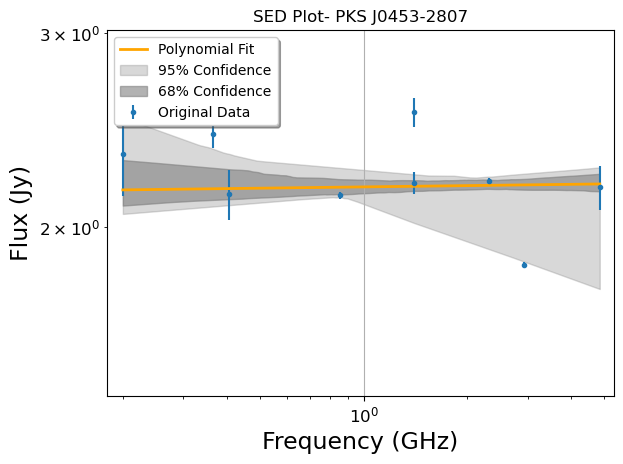

Mu max: 17.23999977111816
Mu max log: 2.8472322519593383


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1]]


Sampling 4 chains for 6_000 tune and 10_000 draw iterations (24_000 + 40_000 draws total) took 63 seconds.


Inference done
Variables: ['a[0]', 'a[1]']
Means: [ 2.96377085 -0.42828643]
SDev: [0.12897601 0.06354441]
Covariance Matrix:
[[ 0.0169,-0.0082],
 [-0.0082, 0.0041]]
Correlation Matrix:
[[ 1.    ,-0.9897],
 [-0.9897, 1.    ]]


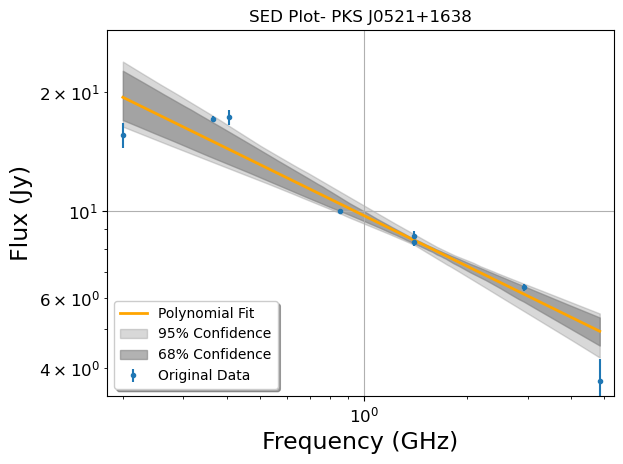

Mu max: 5.738999844
Mu max log: 1.7472849519437892


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1]]


Sampling 4 chains for 6_000 tune and 10_000 draw iterations (24_000 + 40_000 draws total) took 80 seconds.


Inference done
Variables: ['a[0]', 'a[1]']
Means: [ 1.66874053 -0.31060642]
SDev: [0.01051877 0.00437103]
Covariance Matrix:
[[ 1.1861e-04,-4.6991e-05],
 [-4.6991e-05, 1.9403e-05]]
Correlation Matrix:
[[ 1.    ,-0.9796],
 [-0.9796, 1.    ]]


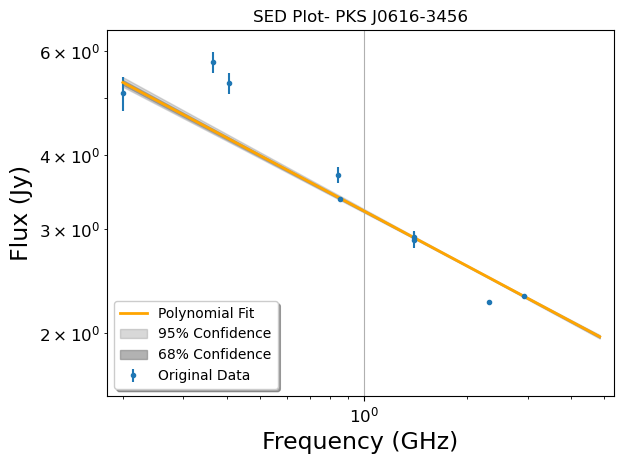

Mu max: 2.555
Mu max log: 0.9380522236556679


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1]]


Sampling 4 chains for 6_000 tune and 10_000 draw iterations (24_000 + 40_000 draws total) took 44 seconds.


Inference done
Variables: ['a[0]', 'a[1]']
Means: [ 0.93904667 -0.36670954]
SDev: [0.0073072  0.01184033]
Covariance Matrix:
[[ 4.8533e-05,-3.9091e-05],
 [-3.9091e-05, 1.4870e-04]]
Correlation Matrix:
[[ 1.    ,-0.4602],
 [-0.4602, 1.    ]]


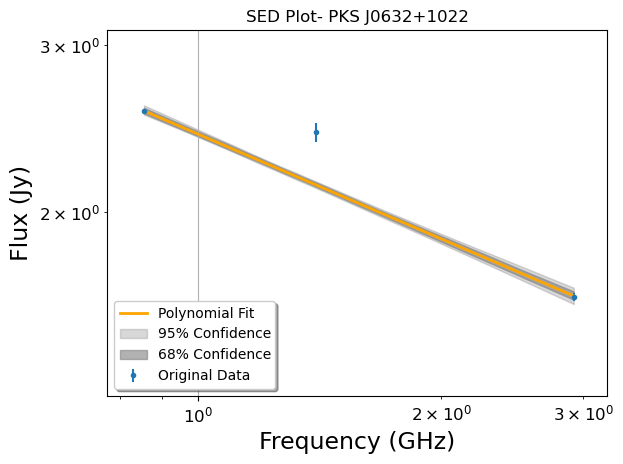

Mu max: 5.771
Mu max log: 1.7528453757288294


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1]]


Sampling 4 chains for 6_000 tune and 10_000 draw iterations (24_000 + 40_000 draws total) took 57 seconds.


Inference done
Variables: ['a[0]', 'a[1]']
Means: [1.35659782 0.24713583]
SDev: [0.00848708 0.0074634 ]
Covariance Matrix:
[[6.9725e-05,5.2706e-05],
 [5.2706e-05,5.5891e-05]]
Correlation Matrix:
[[1.    ,0.8443],
 [0.8443,1.    ]]


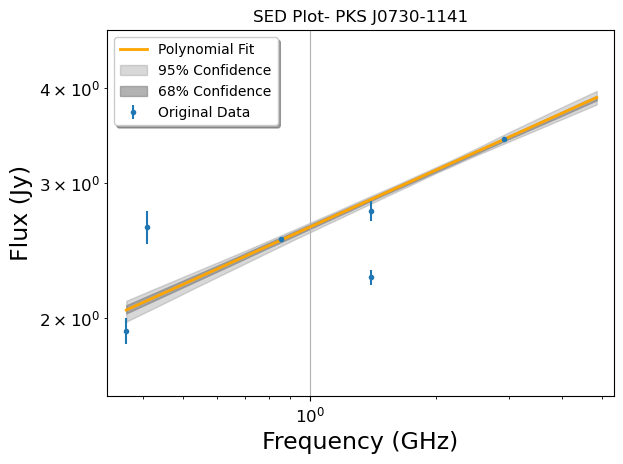

Mu max: 5.0933
Mu max log: 1.6279259505462316


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1]]


Sampling 4 chains for 6_000 tune and 10_000 draw iterations (24_000 + 40_000 draws total) took 142 seconds.


Inference done
Variables: ['a[0]', 'a[1]']
Means: [1.18428227 0.35748713]
SDev: [0.09931316 0.05832293]
Covariance Matrix:
[[0.0095,0.0055],
 [0.0055,0.0033]]
Correlation Matrix:
[[1.    ,0.9931],
 [0.9931,1.    ]]


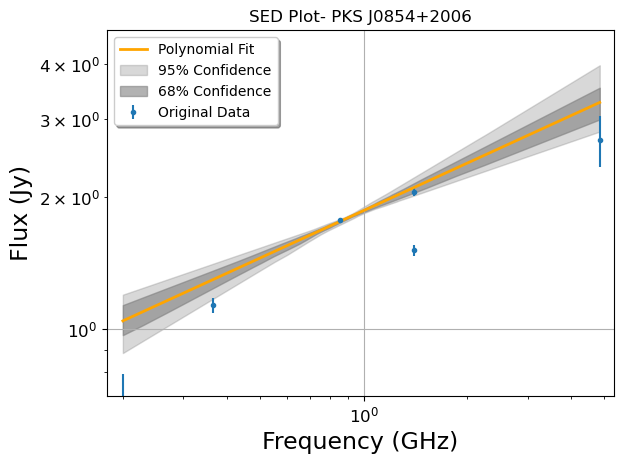

Mu max: 7.59618
Mu max log: 2.027645489351742


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1]]


Sampling 4 chains for 6_000 tune and 10_000 draw iterations (24_000 + 40_000 draws total) took 71 seconds.


Inference done
Variables: ['a[0]', 'a[1]']
Means: [ 2.48784663 -1.01549524]
SDev: [0.03556397 0.01821131]
Covariance Matrix:
[[ 0.0012,-0.0006],
 [-0.0006, 0.0003]]
Correlation Matrix:
[[ 1.    ,-0.9537],
 [-0.9537, 1.    ]]


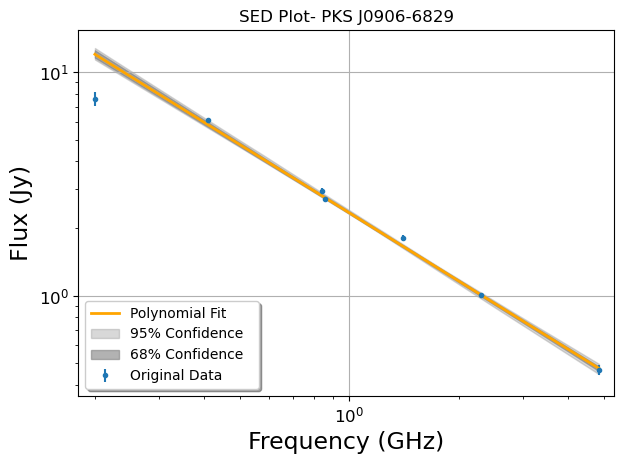

Mu max: 8.774000000000001
Mu max log: 2.1717928027440223


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1]]


Sampling 4 chains for 6_000 tune and 10_000 draw iterations (24_000 + 40_000 draws total) took 36 seconds.


Inference done
Variables: ['a[0]', 'a[1]']
Means: [ 2.17403333 -0.65934544]
SDev: [0.0072715  0.01581794]
Covariance Matrix:
[[ 5.3986e-05,-4.8514e-05],
 [-4.8514e-05, 2.4555e-04]]
Correlation Matrix:
[[ 1.    ,-0.4214],
 [-0.4214, 1.    ]]


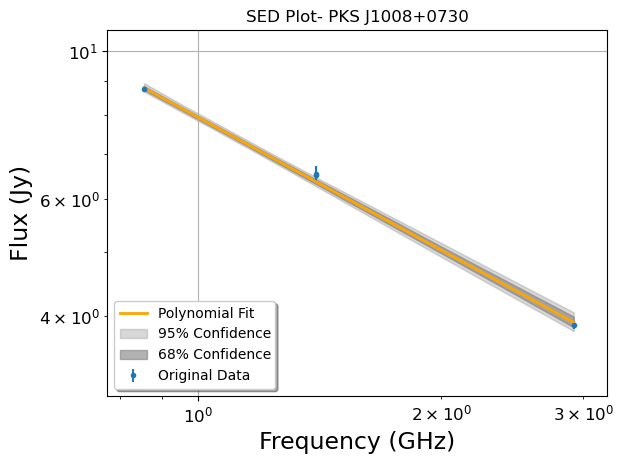

Mu max: 6.254453000000001
Mu max log: 1.8332936900549288


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [a[0], a[1]]


Sampling 4 chains for 6_000 tune and 10_000 draw iterations (24_000 + 40_000 draws total) took 66 seconds.


Inference done
Variables: ['a[0]', 'a[1]']
Means: [ 2.15733688 -0.96153851]
SDev: [0.02396624 0.01674657]
Covariance Matrix:
[[ 0.0006,-0.0004],
 [-0.0004, 0.0003]]
Correlation Matrix:
[[ 1.    ,-0.9598],
 [-0.9598, 1.    ]]


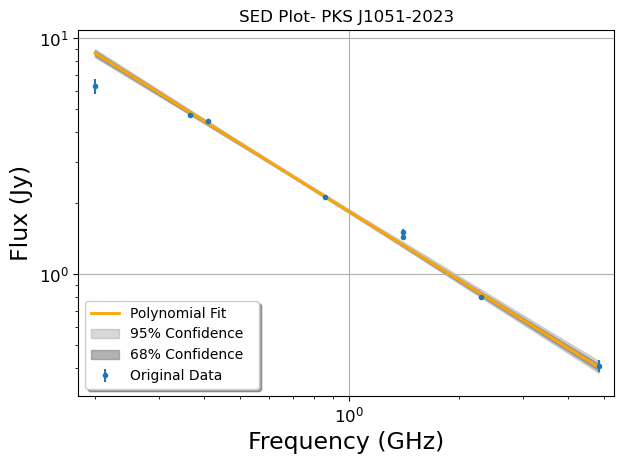

In [24]:
issue_with_3 = [] #empty list to store 'bad sources'

for i in linear_sources.index:

    try:
        nrows = len(linear_sources)  # Assuming you want a single column for each source
        ncols = 1  # One plot per source in a column

        src_name = Data_To_plot['SRC_NAME'][i]

        #datatoplot = get_data_to_use(Data_To_plot, src_name)

        datatoplot = get_data_to_use(linear_sources, src_name)


        # Define a function that we will fit to the data. The function
        # takes an array of values, x, at which to calculate its values,
        # and parameters, m (the slope), yinter (the y intercept), that we wish to fit.
        #source_name = src_to_extract

        nu = datatoplot['nuMHZ']*1e6 # to Hertz
        mu = datatoplot['SmJy']*1e-3# to Jy
        sigmaS = datatoplot['emJy']*1e-3 # to Jy
        #nu0=1.0e9

        lognu = np.log(nu)
        logS = np.log(mu)

        # Doing a fitting to find the maximum
        #perform a polynomial fit to the source of interests' data(s,nu log-log plot). 
        #(p) contains the coefficients of the fitted polynomial, and cov is the covariance matrix.
        p, cov = np.polyfit(lognu, 
                            logS, 
                            1, #3
                            w=1/sigmaS, 
                            cov=True)


        freq = np.linspace(np.min(nu), np.max(nu), 1000)
        #freq = nu

        #iMin_freq = np.round(freq[np.exp(np.polyval(p,np.log(freq))).argmin()], 2) 



        iMax_freq = np.round(freq[np.exp(np.polyval(p,np.log(freq))).argmax()], 2) 
        #evaluate value of fitted polynomial at x-freq on the log scale, covert back .exp and find the maximum.
        #iMax_freq = 1.0e9


        names, stats, a_cov, a_corr, idata, imodel = sf.data_inference('PKS '+src_name,
                                                                   freq=nu,
                                                                   mu=mu,
                                                                   sigma=sigmaS,
                                                                   order=2,#linear model
                                                                   nu0=iMax_freq,
                                                                    #nu0=1.0e9
                                                                
                                                                  )
        print('Inference done')


        a = stats[0] # Means #Extract the mean values (coefficients) from the inference results.
        # a0 = a[0]    #extract the three coefficients from the means
        # a1 = a[1]
        # a2 = a[2]
        # #a3 = a[3]


        #1. Call get_bound function with the model frequency array and calculate confidence levels
        model_freq = freq/iMax_freq
        
        lower_68, upper_68, lower_95, upper_95 = get_bound(idata, model_freq, iMax_freq)
        
        
        # ------------------- PLOTTING CODE BLOCK -------------------
        
        #2. Create the figure and plot data
        
        fig, ax = sf.dataplot(plt, src_name, freq=nu, mu=mu, sigma=sigmaS)
        nu = np.linspace(freq[0], freq[-1], 100)


        #3. Calculate and plot the polynomial fit line (Plotted on top)
        S = sf.flux(nu, a, nu0=iMax_freq)
        ax.plot(nu * 1e-9, S, label="Polynomial Fit", color='orange', linewidth=2)


        #4. Plot the 95% confidence interval (Wider, Lighter Shading)
        # Use nu_model for the X-axis (must be length 100)
        ax.fill_between((model_freq*iMax_freq) * 1e-9, 
                       lower_95, 
                       upper_95, 
                       color='grey', 
                       alpha=0.3, 
                       label='95% Confidence') 

        #5. Plot the 68% confidence interval (Narrower, Darker Shading)
        ax.fill_between((model_freq*iMax_freq) * 1e-9, 
                       lower_68, 
                       upper_68, 
                       color='grey', 
                       alpha=0.6, 
                       label='68% Confidence')



        #6. Set axis scales and limits (Ensures visible plot)
        ax.set_xscale('log')
        ax.set_yscale('log')
        
        #7. Set limits based on the data range and the 95% bounds
        ax.set_xlim(nu.min() * 1e-9 * 0.9, nu.max() * 1e-9 * 1.1)
        ax.set_ylim(lower_95.min() * 0.8, upper_95.max() * 1.2)
        
        #8. Define custom legend variables
        x0, y0, width, height = 0, 0, 0.35, 1
   

        ax.legend(loc='best',
           fontsize='small',
           bbox_to_anchor=(x0, y0, width, height),
           ncol=1, 
           mode="expand", 
           fancybox=True, 
           shadow=True, 

          )
        plt.title(f'SED Plot- PKS {src_name}')
        plt.tight_layout()
        
        
        #9. Save the figure using the defined FIG_PATH (FIX: Saving)
        filename = f'{src_name}_specfit_model_spectrum.png'
        full_path = os.path.join(FIG_PATH, filename)

        plt.savefig(full_path, bbox_inches="tight") 
        

        #10. Print statistics
        print(f"Variables: {names}")
        print(f"Means: {stats[0]}")
        print(f"SDev: {stats[1]}")
        print(f"Covariance Matrix:\n{np.array2string(a_cov, separator=',', precision=4)}")
        print(f"Correlation Matrix:\n{np.array2string(a_corr, separator=',', precision=4)}")

        plt.show()

    except Exception as e:
                issue_with.append(src_name)
                # Leave this print statement in until the code works!
                print(f"ERROR for source {src_name}: {e}") 
#     break





In [ ]:
issue_with_3

In [ ]:
def calculate_residuals(nu, mu, a):
    fitted_flux = sf.flux(nu, a, nu0=iMax_freq) # Use specfit function to calculate fitted flux
    #S= fitted_flux[:len(mu)] 
    mu = mu.reshape(1, -1)
    residuals = (mu - fitted_flux)
    return residuals

In [ ]:
linear_sources

# J0632+1022

In [ ]:
i=24

In [ ]:
issue_with_3 = [] #empty list to store 'bad sources'

#for i in linear_sources.index:

#try:
nrows = len(linear_sources)  # Assuming you want a single column for each source
ncols = 1  # One plot per source in a column

src_name = Data_To_plot['SRC_NAME'][i]

#datatoplot = get_data_to_use(Data_To_plot, src_name)

datatoplot = get_data_to_use(linear_sources, src_name)


# Define a function that we will fit to the data. The function
# takes an array of values, x, at which to calculate its values,
# and parameters, m (the slope), yinter (the y intercept), that we wish to fit.
#source_name = src_to_extract

nu = datatoplot['nuMHZ']*1e6 # to Hertz
mu = datatoplot['SmJy']*1e-3# to Jy
sigmaS = datatoplot['emJy']*1e-3 # to Jy
#nu0=1.0e9

lognu = np.log(nu)
logS = np.log(mu)

# Doing a fitting to find the maximum
#perform a polynomial fit to the source of interests' data(s,nu log-log plot). 
#(p) contains the coefficients of the fitted polynomial, and cov is the covariance matrix.
p, cov = np.polyfit(lognu, 
                    logS, 
                    1, #3
                    w=1/sigmaS, 
                    cov=True)


freq = np.linspace(np.min(nu), np.max(nu), 1000)
#freq = nu

#iMin_freq = np.round(freq[np.exp(np.polyval(p,np.log(freq))).argmin()], 2) 



iMax_freq = np.round(freq[np.exp(np.polyval(p,np.log(freq))).argmax()], 2) 
#evaluate value of fitted polynomial at x-freq on the log scale, covert back .exp and find the maximum.
#iMax_freq = 1.0e9


names, stats, a_cov, a_corr, idata, imodel = sf.data_inference('PKS '+src_name,
                                                           freq=nu,
                                                           mu=mu,
                                                           sigma=sigmaS,
                                                           order=2,#4
                                                           nu0=iMax_freq
                                                            #nu0=1.0e9
                                                          )
print('Inference done')


a = stats[0] # Means #Extract the mean values (coefficients) from the inference results.
# a0 = a[0]    #extract the three coefficients from the means
# a1 = a[1]
# a2 = a[2]
# #a3 = a[3]

#fig, ax = plt.subplots(nrows, ncols, index=i) 

print(f"Variables: {names}")
print(f"Means: {stats[0]}")
print(f"SDev: {stats[1]}")
print(f"Covariance Matrix:\n{np.array2string(a_cov, separator=',', precision=4)}")
print(f"Correlation Matrix:\n{np.array2string(a_corr, separator=',', precision=4)}")


fig1, ax1 = sf.dataplot(plt, src_name, freq=nu, mu=mu, sigma=sigmaS)

nu = np.linspace(freq[0], freq[-1], 100)

S = sf.flux(nu, a, nu0=iMax_freq)

S_res = S[:len(mu)] 
nu_res = nu[:len(mu)] 

residuals = (mu - S_res)

ax1.plot(nu*1e-9, S, label="polynomial fit")

ax1.legend(loc= 'best', fontsize='small')

plt.title(f'Model Spectrum Plot- PKS {src_name}')
#fig1.tight_layout()

plt.savefig(f'/home/elizabeth/Desktop/Thesis/SED_plots/10Apr/Linear_sources2/{src_name}specfit_model_spectrum_.png', 
            bbox_inches="tight")

plt.show()

fig2, ax2 = plt.scatter(nu_res*1e-9, residuals, color='red',
            alpha=0.5, label=f"Residuals")  # Plot residuals with transparency


ax2.title(f'Residuals PKS {src_name}')
ax2.set_xlabel("Frequency (GHz)")
plt.grid(True)

plt.show()

#except Exception as e:

issue_with_3.append(src_name)

#break

#break






In [ ]:
plt.scatter(nu_res*1e-9, residuals, color='red',
                    alpha=0.5, label=f"Residuals")  # Plot residuals with transparency

plt.title(f'Residuals PKS {src_name}')
plt.xlabel("Frequency (GHz)")
plt.grid(True)
#plt.savefig("j1939_peaks.pdf")
plt.show()